## News Sentiment Analysis and Crypto price prediction

In [1]:
## Book 2 : Dogecoin Sentiment Analysis & Merging Sentiment Data with Closing Prices

In [2]:
# Initial imports
import nltk
import numpy as np
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime, date
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/riteshchugani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Load the News Articles from the CSV File as a DataFrame

In [4]:
# Load news from CSV file
file_path = Path("dogecoin_news_en_.csv")
news_df = pd.read_csv(file_path, encoding="utf-8-sig")
news_df.head()

,title,description,text,date,language
0,Key dogecoin developer Ross Nicoll is stepping...,"""I'm handing over everything I can to the Doge...","Ross Nicoll, one of the primary developers beh...",2022-02-17,en
1,"Ukraine is asking for dogecoin donations, pref...","Dogecoin is now worth more than rubles, accord...","Dogecoin is now worth more than rubles, accord...",2022-03-02,en
2,"Bitcoin, Dogecoin, Shiba Inu and other cryptoc...","Far from being a safe bet in risky times, cryp...",Cryptocurrencies around the world are getting ...,2022-02-18,en
3,Crypto Users Answer Ukraine's Call for Help By...,"However, some crypto platforms are refusing to...",As the international community rallies around ...,2022-03-03,en
4,EU checking if cryptoassets being used to bust...,The European Commission is studying whether cr...,"Representations of cryptocurrencies Bitcoin, E...",2022-03-02,en


In [5]:
#Viewing the count of various elements in the data frame
news_df.count()

title          100
description     99
text           100
date           100
language       100
dtype: int64

In [6]:
#show how many articles were written about Dogecoin on a particular day.
daily_data = pd.DataFrame(news_df.groupby('date').count())
daily_data

,title,description,text,language
date,,,,
2022-02-10,5,5,5,5
2022-02-11,4,4,4,4
2022-02-12,3,3,3,3
2022-02-13,1,1,1,1
2022-02-14,3,3,3,3
2022-02-15,2,2,2,2
2022-02-16,1,1,1,1
2022-02-17,5,5,5,5
2022-02-18,3,3,3,3


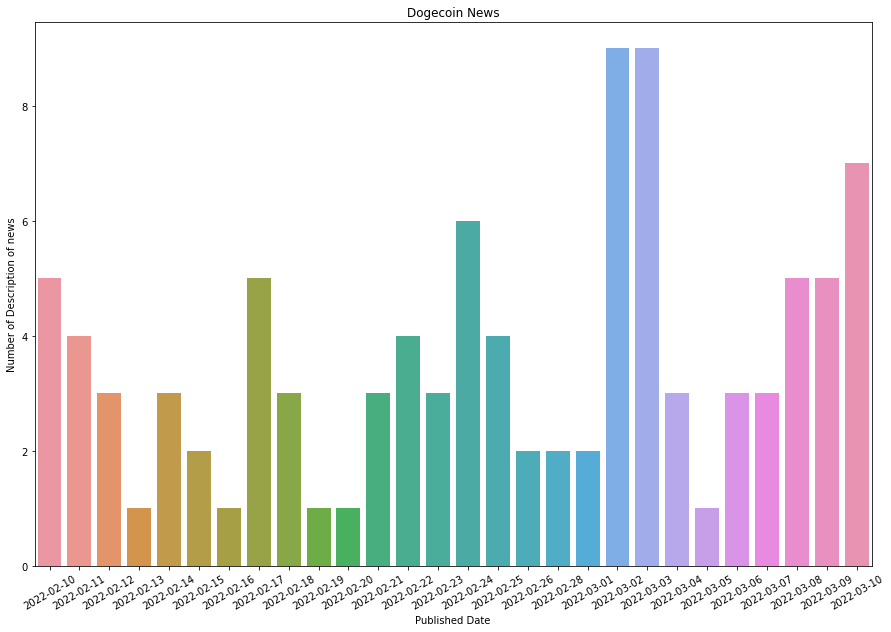

In [7]:
#Plot the number of articles on each day
plt.figure(figsize =(15,10))
ax = sns.barplot( x = daily_data.index , y = daily_data['title'])
ax.set(xlabel = 'Published Date', ylabel = 'Number of Description of news', title = 'Dogecoin News')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.savefig('../Group4/Images/dogecoin_articles.png')
plt.show()

## Calculating VADER Sentiment Score for News Titles and Text

In [8]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [9]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
news_df = news_df.join(title_sentiment_df).join(text_sentiment_df)

news_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Key dogecoin developer Ross Nicoll is stepping...,"""I'm handing over everything I can to the Doge...","Ross Nicoll, one of the primary developers beh...",2022-02-17,en,-0.4215,0.000,0.859,0.141,-1,-0.4215,0.000,0.926,0.074,-1
1,"Ukraine is asking for dogecoin donations, pref...","Dogecoin is now worth more than rubles, accord...","Dogecoin is now worth more than rubles, accord...",2022-03-02,en,0.6133,0.294,0.706,0.000,1,0.5574,0.186,0.747,0.067,1
2,"Bitcoin, Dogecoin, Shiba Inu and other cryptoc...","Far from being a safe bet in risky times, cryp...",Cryptocurrencies around the world are getting ...,2022-02-18,en,-0.3400,0.000,0.806,0.194,-1,0.0000,0.000,1.000,0.000,0
3,Crypto Users Answer Ukraine's Call for Help By...,"However, some crypto platforms are refusing to...",As the international community rallies around ...,2022-03-03,en,0.4019,0.231,0.769,0.000,1,0.0000,0.000,1.000,0.000,0
4,EU checking if cryptoassets being used to bust...,The European Commission is studying whether cr...,"Representations of cryptocurrencies Bitcoin, E...",2022-03-02,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0


## Analyzing Sentiments Results

<AxesSubplot:title={'center':'News Title and Text Sentiment Comparisson'}>

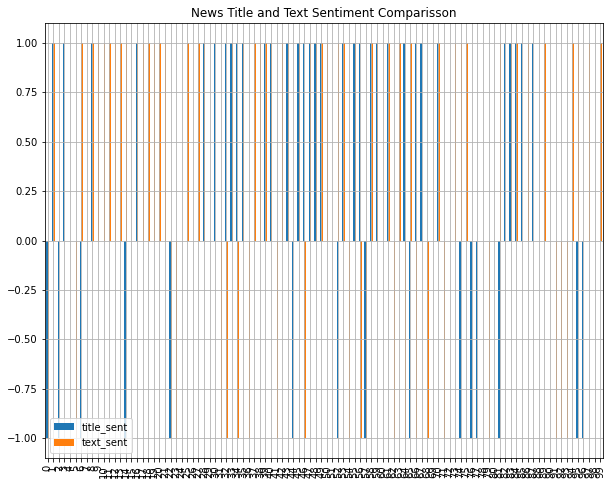

In [10]:
# Plot bar chart
news_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [11]:
#Grouping the data by date and finding the avg title sentiment compound score on that day
title_sentiment_avg = news_df.groupby('date')[['title_compound']].mean()

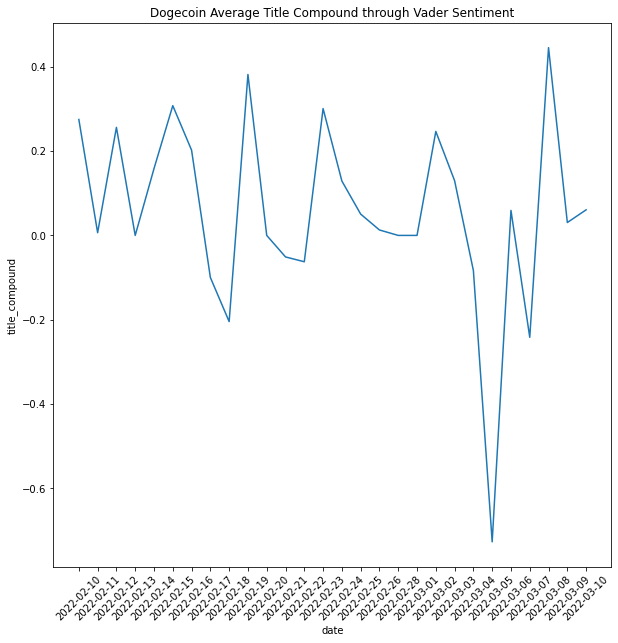

In [12]:
#Plot the title compound scores according to the dates
plt.figure(figsize =(10,10))
plt.xticks(rotation=45)
sns.lineplot(x = title_sentiment_avg.index, y = title_sentiment_avg['title_compound']).set_title('Dogecoin Average Title Compound through Vader Sentiment')
plt.savefig('../Group4/Images/dogecoin_vader.png')
plt.show()

In [13]:
# Describe dataframe
news_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.089046,0.101550,0.859180,0.039290,0.1800,0.128345,0.070550,0.891020,0.038370,0.300000
std,0.299914,0.144368,0.161051,0.089196,0.6724,0.402467,0.074474,0.088687,0.058238,0.810287
min,-0.726900,0.000000,0.396000,0.000000,-1.0000,-0.874800,0.000000,0.639000,0.000000,-1.000000
25%,0.000000,0.000000,0.730750,0.000000,0.0000,0.000000,0.000000,0.832000,0.000000,0.000000
50%,0.000000,0.000000,0.905000,0.000000,0.0000,0.051600,0.059500,0.909000,0.000000,1.000000
75%,0.202300,0.182500,1.000000,0.000000,1.0000,0.440400,0.120000,0.952750,0.063000,1.000000
max,0.840200,0.583000,1.000000,0.402000,1.0000,0.859100,0.316000,1.000000,0.294000,1.000000


## Dogecoin Crypto price

In [14]:
#Getting Crypto price of Dogecoin from Yahoo Finance
doge_df = yf.download('DOGE-USD', 
                      start='2022-02-10', 
                      end='2022-03-10', 
                      progress=False,
)
doge_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-10,0.159145,0.160437,0.151497,0.151889,0.151889,1053630584
2022-02-11,0.151895,0.154069,0.143349,0.144847,0.144847,776730555
2022-02-12,0.144856,0.147013,0.141678,0.144405,0.144405,602699408
2022-02-13,0.144379,0.157354,0.144031,0.148948,0.148948,1581065491
2022-02-14,0.148869,0.150132,0.143649,0.146003,0.146003,898042727


<AxesSubplot:xlabel='Date'>

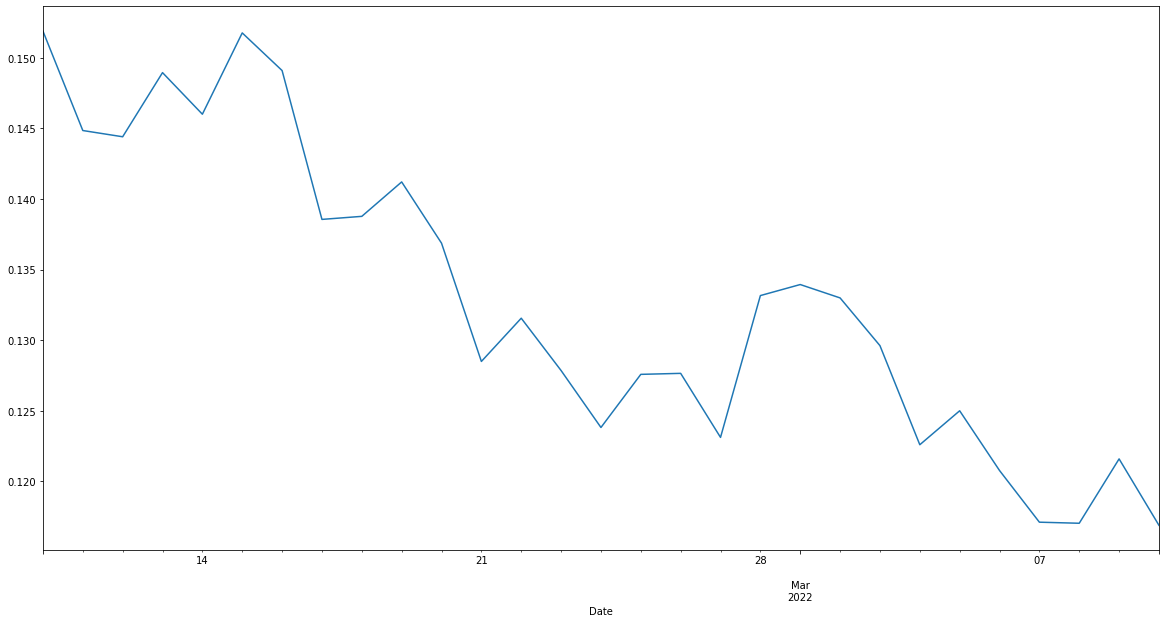

In [15]:
#Plotting the closing prices
doge_df['Close'].plot(label = 'Closing Price', figsize = (20,10))

## Merging Dogecoin Price with Sentiment Data

In [16]:
#Extracting the sentiment result from the News DF
news_df_edit = news_df.drop(columns=["title", "description", "text", "language"])
news_df_edit.head()

,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-02-17,-0.4215,0.000,0.859,0.141,-1,-0.4215,0.000,0.926,0.074,-1
1,2022-03-02,0.6133,0.294,0.706,0.000,1,0.5574,0.186,0.747,0.067,1
2,2022-02-18,-0.3400,0.000,0.806,0.194,-1,0.0000,0.000,1.000,0.000,0
3,2022-03-03,0.4019,0.231,0.769,0.000,1,0.0000,0.000,1.000,0.000,0
4,2022-03-02,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0


In [17]:
#Parsing date to date time format
news_df_edit["date"] = pd.to_datetime(news_df_edit["date"])
print(news_df_edit.dtypes)

date              datetime64[ns]
title_compound           float64
title_pos                float64
title_neu                float64
title_neg                float64
title_sent                 int64
text_compound            float64
text_pos                 float64
text_neu                 float64
text_neg                 float64
text_sent                  int64
dtype: object


In [18]:
#Sorting Values by Date
news_df_edit.sort_values(by='date', inplace=True)
print(news_df_edit)

         date  title_compound  title_pos  title_neu  title_neg  title_sent  \
49 2022-02-10          0.4767      0.341      0.659      0.000           1   
83 2022-02-10          0.4939      0.276      0.724      0.000           1   
66 2022-02-10          0.2023      0.184      0.816      0.000           1   
43 2022-02-10          0.2023      0.130      0.870      0.000           1   
41 2022-02-10          0.0000      0.000      1.000      0.000           0   
..        ...             ...        ...        ...        ...         ...   
17 2022-03-10          0.0000      0.000      1.000      0.000           0   
69 2022-03-10          0.0000      0.000      1.000      0.000           0   
16 2022-03-10          0.5719      0.381      0.619      0.000           1   
6  2022-03-10         -0.5859      0.000      0.703      0.297          -1   
61 2022-03-10          0.4389      0.266      0.734      0.000           1   

    text_compound  text_pos  text_neu  text_neg  text_sent  
49

In [19]:
#Grouping all the title sentiment of the same date into the min value of that date - Conservative Approach to ensure we are not overestimating
news_df_title = news_df_edit.groupby('date', as_index=False, sort=False)['title_sent'].min()
news_df_title

,date,title_sent
0,2022-02-10,0
1,2022-02-11,0
2,2022-02-12,0
3,2022-02-13,0
4,2022-02-14,0
5,2022-02-15,1
6,2022-02-16,1
7,2022-02-17,-1
8,2022-02-18,-1
9,2022-02-19,1


In [20]:
#Grouping all the text sentiment of the same date into the min value of that date - Conservative Approach to ensure we are not overestimating
news_df_text = news_df_edit.groupby('date', as_index=False, sort=False)['text_sent'].min()
news_df_text

,date,text_sent
0,2022-02-10,-1
1,2022-02-11,0
2,2022-02-12,-1
3,2022-02-13,1
4,2022-02-14,-1
5,2022-02-15,1
6,2022-02-16,1
7,2022-02-17,-1
8,2022-02-18,-1
9,2022-02-19,1


In [21]:
#Renaming the column to Date which is same as crypto column and indexing the DF by date 
news_df_title = news_df_title.rename(columns={'date': 'Date'})
news_df_title.set_index('Date', inplace=True)
news_df_title.head()

,title_sent
Date,
2022-02-10,0
2022-02-11,0
2022-02-12,0
2022-02-13,0
2022-02-14,0


In [22]:
#Renaming the column to Date which is same as crypto column and indexing the DF by date 
news_df_text = news_df_text.rename(columns={'date': 'Date'})
news_df_text.set_index('Date', inplace=True)
news_df_text.head()

,text_sent
Date,
2022-02-10,-1
2022-02-11,0
2022-02-12,-1
2022-02-13,1
2022-02-14,-1


In [23]:
#Concat the crypto price with sentiment data
sentiment_closing_df = pd.concat([news_df_title,news_df_text,doge_df], axis=1)
sentiment_closing_df.head()

,title_sent,text_sent,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2022-02-10,0.0,-1.0,0.159145,0.160437,0.151497,0.151889,0.151889,1053630584
2022-02-11,0.0,0.0,0.151895,0.154069,0.143349,0.144847,0.144847,776730555
2022-02-12,0.0,-1.0,0.144856,0.147013,0.141678,0.144405,0.144405,602699408
2022-02-13,0.0,1.0,0.144379,0.157354,0.144031,0.148948,0.148948,1581065491
2022-02-14,0.0,-1.0,0.148869,0.150132,0.143649,0.146003,0.146003,898042727


In [24]:
#Filling in empty values of title_sent with their most recent value positions - This is done when news is missing for any particular date
sentiment_closing_df['title_sent'] = sentiment_closing_df['title_sent'].fillna(method='ffill')
sentiment_closing_df.head()

,title_sent,text_sent,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2022-02-10,0.0,-1.0,0.159145,0.160437,0.151497,0.151889,0.151889,1053630584
2022-02-11,0.0,0.0,0.151895,0.154069,0.143349,0.144847,0.144847,776730555
2022-02-12,0.0,-1.0,0.144856,0.147013,0.141678,0.144405,0.144405,602699408
2022-02-13,0.0,1.0,0.144379,0.157354,0.144031,0.148948,0.148948,1581065491
2022-02-14,0.0,-1.0,0.148869,0.150132,0.143649,0.146003,0.146003,898042727


In [25]:
#Filling in empty values of text_sent with their most recent value positions - This is done when news is missing for any particular date
sentiment_closing_df['text_sent'] = sentiment_closing_df['text_sent'].fillna(method='ffill')
sentiment_closing_df.head()

,title_sent,text_sent,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2022-02-10,0.0,-1.0,0.159145,0.160437,0.151497,0.151889,0.151889,1053630584
2022-02-11,0.0,0.0,0.151895,0.154069,0.143349,0.144847,0.144847,776730555
2022-02-12,0.0,-1.0,0.144856,0.147013,0.141678,0.144405,0.144405,602699408
2022-02-13,0.0,1.0,0.144379,0.157354,0.144031,0.148948,0.148948,1581065491
2022-02-14,0.0,-1.0,0.148869,0.150132,0.143649,0.146003,0.146003,898042727


In [26]:
#Save tha final DataFrame as a CSV file for further analysis in the forthcoming activities.
file_path = Path("sentiment_closing_doge.csv")
sentiment_closing_df.to_csv(file_path, index=True, encoding='utf-8-sig')

In [27]:
# Sorting title_sent into Positive, Negative and Neutral sentiment

sentiment = [] 
for score in sentiment_closing_df['title_sent']:
    if score >= 1 :
          sentiment.append("Positive") 
    elif score <= - 1 : 
          sentiment.append("Negative")        
    else : 
        sentiment.append("Neutral")   

sentiment_closing_df["Title_Sentiment"] = sentiment
sentiment_closing_df.head()

,title_sent,text_sent,Open,High,Low,Close,Adj Close,Volume,Title_Sentiment
Date,,,,,,,,,
2022-02-10,0.0,-1.0,0.159145,0.160437,0.151497,0.151889,0.151889,1053630584,Neutral
2022-02-11,0.0,0.0,0.151895,0.154069,0.143349,0.144847,0.144847,776730555,Neutral
2022-02-12,0.0,-1.0,0.144856,0.147013,0.141678,0.144405,0.144405,602699408,Neutral
2022-02-13,0.0,1.0,0.144379,0.157354,0.144031,0.148948,0.148948,1581065491,Neutral
2022-02-14,0.0,-1.0,0.148869,0.150132,0.143649,0.146003,0.146003,898042727,Neutral


In [28]:
# Sentiment Count
sentiment_closing_df['Title_Sentiment'].value_counts()

Neutral     15
Negative    11
Positive     3
Name: Title_Sentiment, dtype: int64

<AxesSubplot:title={'center':'Dogecoin Title Sentiment Classification'}>

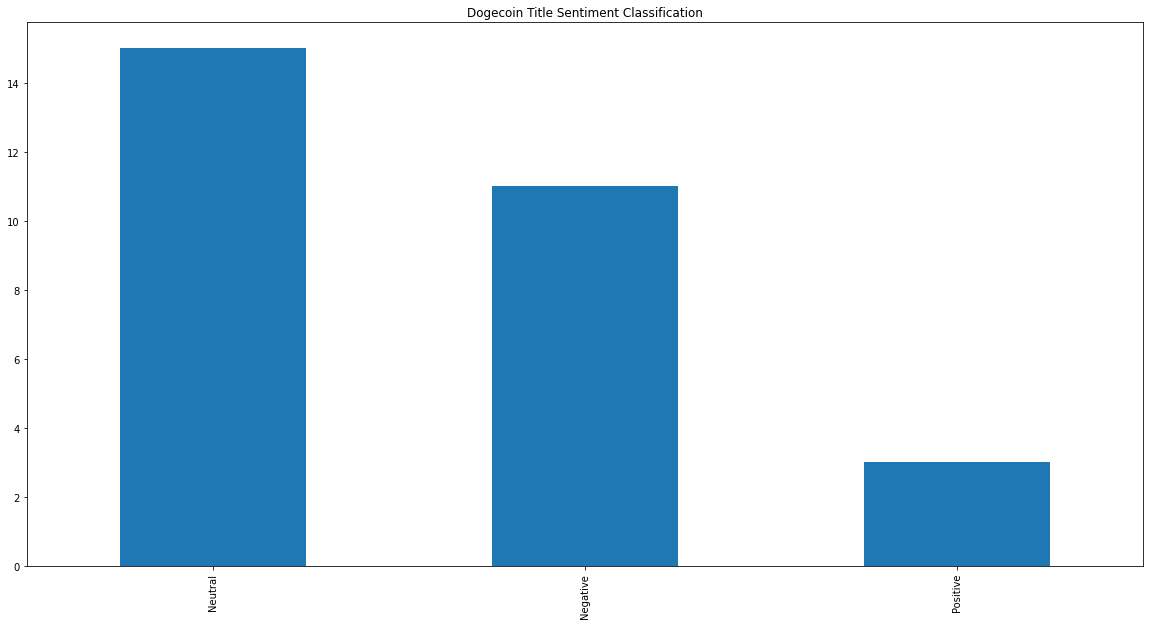

In [29]:
# Sentiment Plot
sentiment_closing_df['Title_Sentiment'].value_counts().plot.bar(title = 'Dogecoin Title Sentiment Classification', figsize = (20,10))

In [30]:
#Crypto Price trend basis the difference between current price to previous day price and coverting them to '0' as fall/no change and '1' as rise in stock price
sentiment_closing_df['Price Diff'] = sentiment_closing_df['Close'].diff()
sentiment_closing_df.dropna(inplace = True)
sentiment_closing_df['Trend'] = np.where(
    sentiment_closing_df['Price Diff'] > 0 , 1, 0)

sentiment_closing_df.head()

,title_sent,text_sent,Open,High,Low,Close,Adj Close,Volume,Title_Sentiment,Price Diff,Trend
Date,,,,,,,,,,,
2022-02-11,0.0,0.0,0.151895,0.154069,0.143349,0.144847,0.144847,776730555,Neutral,-0.007042,0
2022-02-12,0.0,-1.0,0.144856,0.147013,0.141678,0.144405,0.144405,602699408,Neutral,-0.000442,0
2022-02-13,0.0,1.0,0.144379,0.157354,0.144031,0.148948,0.148948,1581065491,Neutral,0.004543,1
2022-02-14,0.0,-1.0,0.148869,0.150132,0.143649,0.146003,0.146003,898042727,Neutral,-0.002945,0
2022-02-15,1.0,1.0,0.145996,0.152199,0.145203,0.151761,0.151761,674961496,Positive,0.005758,1


In [31]:
## Calculating the days of price trend where price did not increase
sentiment_closing_df.loc[sentiment_closing_df.Trend == 0,"Trend"].count()

17

In [32]:
## Calculating the days of price trend where price did increase
sentiment_closing_df.loc[sentiment_closing_df.Trend == 1,"Trend"].count()

11

In [33]:
# Binary encoding Sentiment column
doge_trend = sentiment_closing_df[["Close", "Volume", "Title_Sentiment", "Trend"]]
doge_trend = pd.get_dummies(doge_trend, columns=["Title_Sentiment"])
doge_trend.head()

,Close,Volume,Trend,Title_Sentiment_Negative,Title_Sentiment_Neutral,Title_Sentiment_Positive
Date,,,,,,
2022-02-11,0.144847,776730555,0,0,1,0
2022-02-12,0.144405,602699408,0,0,1,0
2022-02-13,0.148948,1581065491,1,0,1,0
2022-02-14,0.146003,898042727,0,0,1,0
2022-02-15,0.151761,674961496,1,0,0,1


In [34]:
#Save tha final DataFrame as a CSV file for further analysis in the forthcoming activities.
file_path = Path("doge_trend.csv")
doge_trend.to_csv(file_path, index=True, encoding='utf-8-sig')

## Calculating the Correlation of Title Compound Avg with Daily Close Price & Daily Returns

<AxesSubplot:xlabel='Date', ylabel='title_sent'>

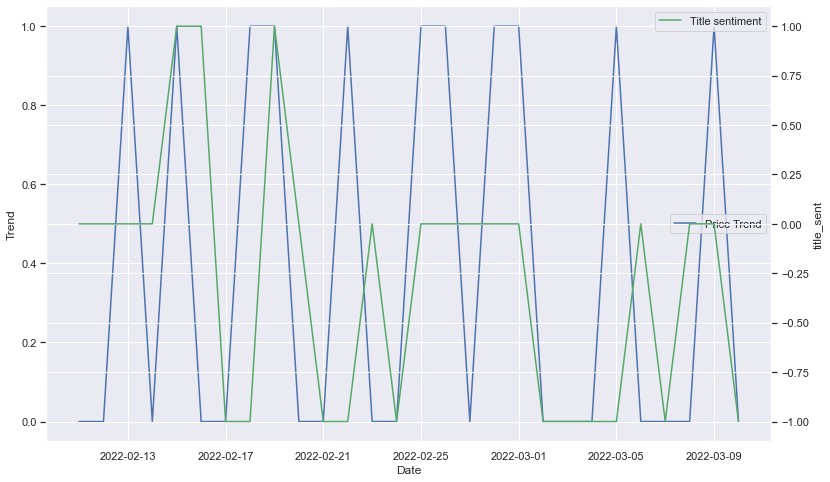

In [35]:
#Ploting the title_sent with Trend of closing prices
sns.set(rc={'figure.figsize':(13.0,8.0)})
ax=sns.lineplot(data=sentiment_closing_df['Trend'], color="b",label='Price Trend')
ax2 = plt.twinx()
sns.lineplot(data=sentiment_closing_df["title_sent"], color="g", ax=ax2, label='Title sentiment')

In [36]:
#Grouping all the title compound of the same date into the avg value of that date 
title_compound_avg = news_df_edit.groupby('date', as_index=False, sort=False)['title_compound'].mean()

#Renaming the column to Date which is same as crypto column and indexing the DF by date 
title_compound_avg = title_compound_avg.rename(columns={'date': 'Date'})
title_compound_avg.set_index('Date', inplace=True)

#Concat the crypto price with sentiment data
title_closing_df = pd.concat([title_compound_avg,doge_df], axis=1)
title_closing_df.head()

,title_compound,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-02-10,0.275040,0.159145,0.160437,0.151497,0.151889,0.151889,1053630584
2022-02-11,0.006450,0.151895,0.154069,0.143349,0.144847,0.144847,776730555
2022-02-12,0.256267,0.144856,0.147013,0.141678,0.144405,0.144405,602699408
2022-02-13,0.000000,0.144379,0.157354,0.144031,0.148948,0.148948,1581065491
2022-02-14,0.158500,0.148869,0.150132,0.143649,0.146003,0.146003,898042727


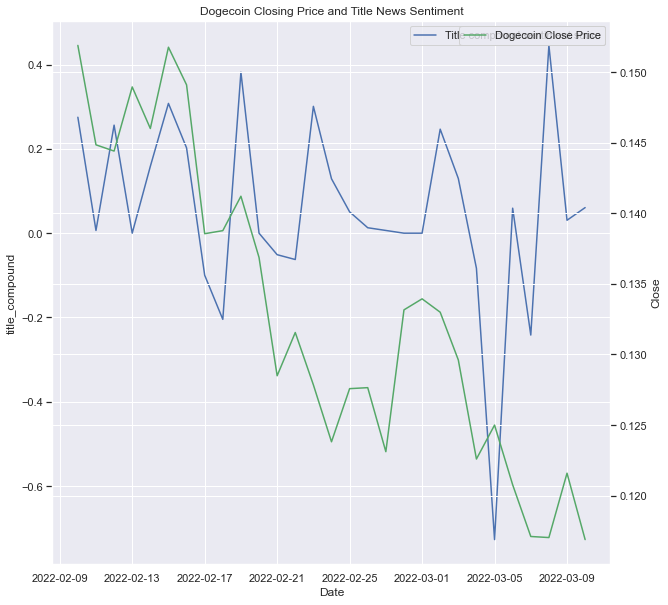

In [37]:
#Plotting the Title Compound Avg with closing prices
sns.set(rc={'figure.figsize':(10,10)})
ax=sns.lineplot(data=title_closing_df['title_compound'], color="b",label='Title compound sentiment score')
ax2 = plt.twinx()
sns.lineplot(data=title_closing_df["Close"], color="g", ax=ax2, label='Dogecoin Close Price').set_title('Dogecoin Closing Price and Title News Sentiment')
plt.savefig('../Group4/Images/dogecoin_closing.png')

In [38]:
# Use the drop function to drop extra columns
doge_close = title_closing_df.drop(columns=["title_compound", "Open", "High", "Low", "Adj Close", "Volume"])

# Display sample data
doge_close.head()

,Close
Date,
2022-02-10,0.151889
2022-02-11,0.144847
2022-02-12,0.144405
2022-02-13,0.148948
2022-02-14,0.146003


In [39]:
# Use the `pct_change` function to calculate daily returns of Dogecoin
doge_returns = doge_close.pct_change().dropna()

# Display sample data
doge_returns.head()

,Close
Date,
2022-02-11,-0.046363
2022-02-12,-0.003051
2022-02-13,0.031460
2022-02-14,-0.019772
2022-02-15,0.039438


In [40]:
# Use the drop function to drop extra columns
sentiment_close = title_closing_df.drop(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])

In [41]:
# Merge Title compound from sentiment with Doge daily returns
topic_sentiments = doge_returns.join(sentiment_close).dropna(how="any")

# Display data
display(topic_sentiments)

,Close,title_compound
Date,,
2022-02-11,-0.046363,0.006450
2022-02-12,-0.003051,0.256267
2022-02-13,0.031460,0.000000
2022-02-14,-0.019772,0.158500
2022-02-15,0.039438,0.307850
2022-02-16,-0.017567,0.202300
2022-02-17,-0.070713,-0.099740
2022-02-18,0.001559,-0.204400
2022-02-19,0.017569,0.381800


In [42]:
# Correlate the Title Compound Avg to Daily returns
topic_sentiments.corr().style.background_gradient()

,Close,title_compound
Close,1.000000,0.036181
title_compound,0.036181,1.000000


In [43]:
# Use the drop function to drop extra columns
title_and_close = title_closing_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])

# Display sample data
title_and_close.head()

,title_compound,Close
Date,,
2022-02-10,0.275040,0.151889
2022-02-11,0.006450,0.144847
2022-02-12,0.256267,0.144405
2022-02-13,0.000000,0.148948
2022-02-14,0.158500,0.146003


In [44]:
# Correlate the Title Compound Avg to Closing Price
title_and_close.corr().style.background_gradient()

,title_compound,Close
title_compound,1.000000,0.274813
Close,0.274813,1.000000


In [45]:
# Check Correlation between Title_sent and close
# Use the drop function to drop extra columns
title_and_close1 = sentiment_closing_df.drop(columns=["Open", "text_sent", "Title_Sentiment", "Price Diff", "Trend", "High", "Low", "Adj Close", "Volume"])

# Display sample data
title_and_close1.head()


,title_sent,Close
Date,,
2022-02-11,0.0,0.144847
2022-02-12,0.0,0.144405
2022-02-13,0.0,0.148948
2022-02-14,0.0,0.146003
2022-02-15,1.0,0.151761


In [46]:
# Correlate the Title Sentiment to Closing Price
title_and_close1.corr().style.background_gradient()

,title_sent,Close
title_sent,1.000000,0.506277
Close,0.506277,1.000000
